# Interpolacija funkcija
## Uvod u interpolaciju

Zamislimo da imamo skup točaka, te da kroz njih želimo provući polinom najmanjeg stupnja. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([2 ,4 , 6, 8, 10 , 12, 14, 16, 18, 20, 22, 24])
f=np.array([0.0 ,0.35 , 0.46, 0.48, 0.50, 0.39,0.27,0.18,0.13,0.09, 0.07, 0.05])
fig= plt.subplots(figsize=(6,5))
plt.plot(x, f, 'bo', label="Podaci")
plt.xlabel('Brzina vjetra[m/s]')
plt.ylabel('Koeficijent snage')
plt.legend(loc='upper right')
plt.savefig("podaci.pdf") 

Sada ćemo navedene podatke interpolirati interpolacijskim polinomom. Koristi ćemo Lagrangeovo interpolacijski polinom iz SciPy biblioteke.

In [2]:
from scipy.interpolate import lagrange
P=lagrange(x, f)

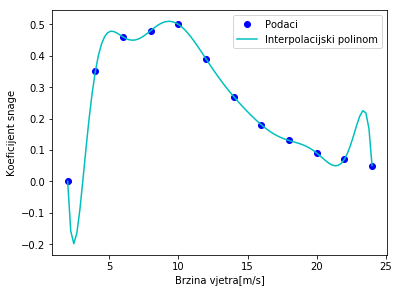

In [3]:
xp = np.linspace(2, 24, 100)
fig= plt.subplots(figsize=(6,4.5))
plt.plot(x, f, 'bo',label="Podaci")
plt.plot(xp, P(xp), 'c-', label="Interpolacijski polinom")

plt.ylabel('Koeficijent snage')
plt.xlabel('Brzina vjetra[m/s]')
plt.legend(loc='upper right')
plt.savefig("interpolacija.pdf") 

U predavanjima zadnjeg tjedna prvog ciklusa, vidjet ćemo i tzv. kubične splajnove, što su posebni tipovi glatkih funkcija koje prolaze kroz zadane točke. U sljedećem kodu smo provukli kroz zadane točke tzv. kubični splajn.

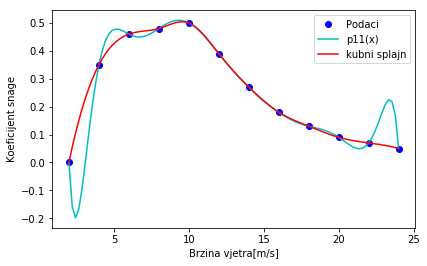

In [4]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, f)
fig= plt.subplots(figsize=(6.5, 4))
plt.plot(x, f, 'bo', label="Podaci")
plt.plot(xp, P(xp),'c-',label="p11(x)")
plt.plot(xp, cs(xp),'r-',label="kubni splajn")
plt.legend(loc='upper right')
plt.xlabel('Brzina vjetra[m/s]')
plt.ylabel('Koeficijent snage')
plt.savefig("pol_splajn.pdf") 

## Izvrednjavanje polinoma

Navest ćemo primjer kako možemo izvrijedniti polinom. Zadan je Polinom $p(x)=x^3-2x-5$. Zelimo ga prikazati na grafu pomoću funkcije polyval, koja uzima koeficijente navedenog polinoma i računa vrijednosti u točkama vektora z.

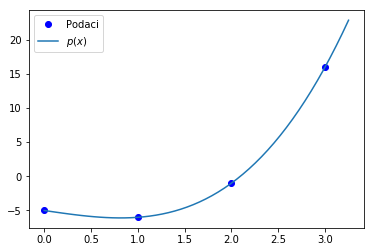

In [5]:
x=np.array([0 ,1 , 2, 3])
y=np.array([-5 ,-6, -1, 16])
a=np.array([1,0 , -2, -5])
z=np.linspace(0.0, 3.25, 50)
pp=np.polyval(a,z)
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(z, pp,label=r'$p(x)$')
plt.legend(loc='upper left')
plt.savefig("primjer.pdf")

Ovdje ćemo implementirati funkciju horner koja računa vrijednost polinoma u točkama danim u ulaznom vektoru. Na ovoj je funkciji bazirana i gore navedena polyval funkcija.

In [6]:
def horner(a, x):
    v = a[0]
    for i in range(1, a.shape[0]):
        v = x * v + a[i]
    return v

Sada ćemo vidjeti dobivamo li iste rezultate kao s funkcijom polyval

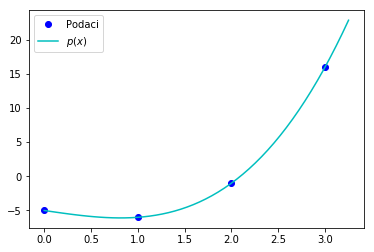

In [7]:
pp1=horner(a,z)
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(z, pp1,'c-',label=r'$p(x)$')
plt.legend(loc='upper left')

## Polinomijalna interpolacija pomoću sustava s Vandermondeovom matricom
Pogledajmo  primjer koji ukazuje na lošu uvjetovanost Vandermondeove matrice pa ne dobivamo polinom koji prolazi kroz zadane točke. Pokušajmo pomoću Vandermondeove matrice izračunati primjer interpolacijskog polinoma za podatke koje dobijemo za funkciju $f(x)=\sin x$ na intervalu $[0,20\pi]$ s ekvidistantnom mrežom od 41 čvor. Također ispisujemo uvjetovanost matrice.

Condition number= 7.6049026858454115e+71


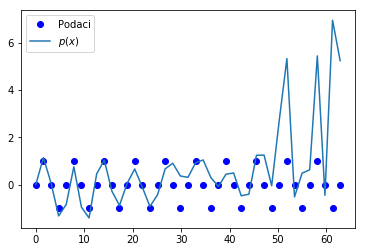

In [8]:
n=40
x=np.linspace(0.0,20*np.pi,n+1, endpoint=True)
xu=np.linspace(0.0,20*np.pi,1000, endpoint=True)
y=np.sin(x)
#Kreiramo Vandermondeovu matricu za dane točke
V=np.vander(x,len(x), increasing=True)
a=np.linalg.solve(V,y)
# Funkcija polyval uzima koeficijente polinoma uz najveću potenciju
# pa moramo "preokrenuti" vektor a i pospremiti u vektor c
c=np.flipud(a)
print("Condition number=", np.linalg.cond(V))
f=np.polyval(c,x)
plt.plot(x,y,'bo', label="Podaci")
plt.plot(x,f, label=r'$p(x)$')
plt.legend(loc='upper left')
plt.savefig("sinus.png") 


# Lagrangeov interpolacijski polinom

Sada vidimo primjer interpolacije Lagrangeovim interpolacijskim polinomom, definirat ćemo funkiju polyinterp, funkcija račna lLagrangeov interpolacijski polinom za podatke x,y te ga izvrednjava u točama ulaznog vektora u. Kao izlat dobivamo vektor vrijednosti Lagrangeovog interpolacijskog polinoma u točkama vektora u.

In [9]:
def polyinterp(x,y,u):
    n=len(x)
    v=np.zeros(np.size(u))
    for k in range(n):
        w=np.ones(np.size(u))
        for j in range(k):
            w=(u-x[j])/(x[k]-x[j])*w
        for j in range(k+1,n):
            w=(u-x[j])/(x[k]-x[j])*w
        v=v+w*y[k]
    return v

Ovu ćemo funkciju primijeniti na računanje interpolacijskog polinoma za podatke koje dobijemo za funkciju $f(x)=\sin x$ na intervalu $[0,20\pi]$ s ekvidistantnom mrežom od 41 čvor.

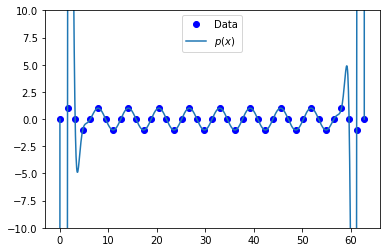

In [12]:
n=40
x=np.linspace(0.0,20*np.pi,n+1, endpoint=True)
y=np.sin(x)
xu=np.linspace(0.0,20*np.pi,1000, endpoint=True)
v=polyinterp(x,y,xu)
plt.plot(x,y,'bo', label="Data")
plt.plot(xu,v, label=r'$p(x)$')
plt.ylim(-10,10)
plt.legend(loc='upper center')
plt.savefig("lagrange1.png") 